In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [38]:
stock = pd.read_csv('Market+Risk+Dataset.csv')

In [39]:
stock.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [40]:
stock.tail(10)

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
304,27-01-2020,769,138,543,705,45,22315,420,167,5,28
305,03-02-2020,767,139,567,748,49,24806,428,198,5,27
306,10-02-2020,776,133,521,737,44,24323,416,191,3,28
307,17-02-2020,786,139,523,744,42,24297,402,193,4,28
308,24-02-2020,722,134,455,697,36,22569,373,154,4,25
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [41]:
stock.columns = stock.columns.str.replace(' ', '_').str.replace('.', '')

In [42]:
stock.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [43]:
print('The number of rows (observations) is',stock.shape[0],'\n''The number of colums is ',stock.shape[1])

The number of rows (observations) is 314 
The number of colums is  11


In [44]:
stock.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [45]:
stock['dates'] = [pd.to_datetime(d) 
                  for d in stock['Date']]


In [46]:
stock.dtypes.value_counts()

int64             10
object             1
datetime64[ns]     1
dtype: int64

In [47]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 314 non-null    object        
 1   Infosys              314 non-null    int64         
 2   Indian_Hotel         314 non-null    int64         
 3   Mahindra_&_Mahindra  314 non-null    int64         
 4   Axis_Bank            314 non-null    int64         
 5   SAIL                 314 non-null    int64         
 6   Shree_Cement         314 non-null    int64         
 7   Sun_Pharma           314 non-null    int64         
 8   Jindal_Steel         314 non-null    int64         
 9   Idea_Vodafone        314 non-null    int64         
 10  Jet_Airways          314 non-null    int64         
 11  dates                314 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 29.6+ KB


In [48]:
dup = stock.duplicated()
stock[dup].sum()

Date                   0.0
Infosys                0.0
Indian_Hotel           0.0
Mahindra_&_Mahindra    0.0
Axis_Bank              0.0
SAIL                   0.0
Shree_Cement           0.0
Sun_Pharma             0.0
Jindal_Steel           0.0
Idea_Vodafone          0.0
Jet_Airways            0.0
dtype: float64

In [49]:
stock.isnull().sum()

Date                   0
Infosys                0
Indian_Hotel           0
Mahindra_&_Mahindra    0
Axis_Bank              0
SAIL                   0
Shree_Cement           0
Sun_Pharma             0
Jindal_Steel           0
Idea_Vodafone          0
Jet_Airways            0
dates                  0
dtype: int64

In [50]:
stock.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


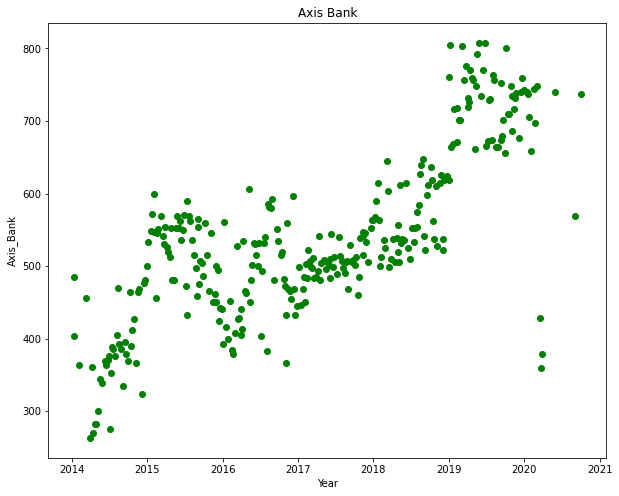

In [68]:
plt.figure(figsize = (10, 8))
plt.scatter(stock['dates'], stock['Axis_Bank'], color = 'green')
plt.xlabel('Year')
plt.ylabel('Axis_Bank')
plt.title('Axis Bank')
plt.show()

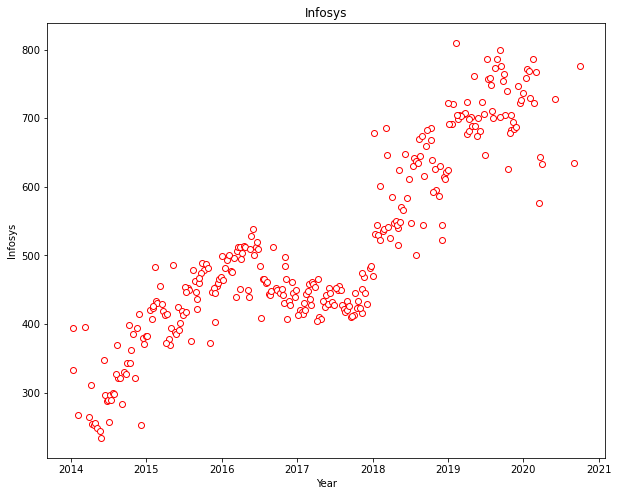

In [69]:
plt.figure(figsize = (10, 8))
stock['dates'] = [pd.to_datetime(d) for d in stock['Date']]
plt.scatter(stock['dates'], stock['Infosys'], edgecolors='r', color = 'white')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys')
plt.show()

In [53]:
streturn = np.log(stock.drop(['Date','dates'],axis=1)).diff(axis = 0)

In [55]:
streturn.shape

(314, 10)

In [56]:
streturn.head(10)

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846
5,-0.031749,-0.015504,0.040656,0.061875,0.061558,0.011400,-0.008217,0.024898,0.012579,-0.016598
6,0.019961,0.060625,0.011881,0.076961,0.112795,0.067622,-0.016639,0.097543,0.048790,0.020705
7,-0.036221,0.199333,0.038615,0.059898,0.136859,0.056790,-0.049881,0.105732,-0.024098,0.169258
8,-0.041847,-0.012121,0.064183,-0.014642,-0.023530,0.048090,0.044835,-0.010084,-0.012270,-0.181630
9,0.135666,0.081917,-0.003559,0.071154,0.213574,0.105167,-0.018724,0.132686,0.024391,0.072031


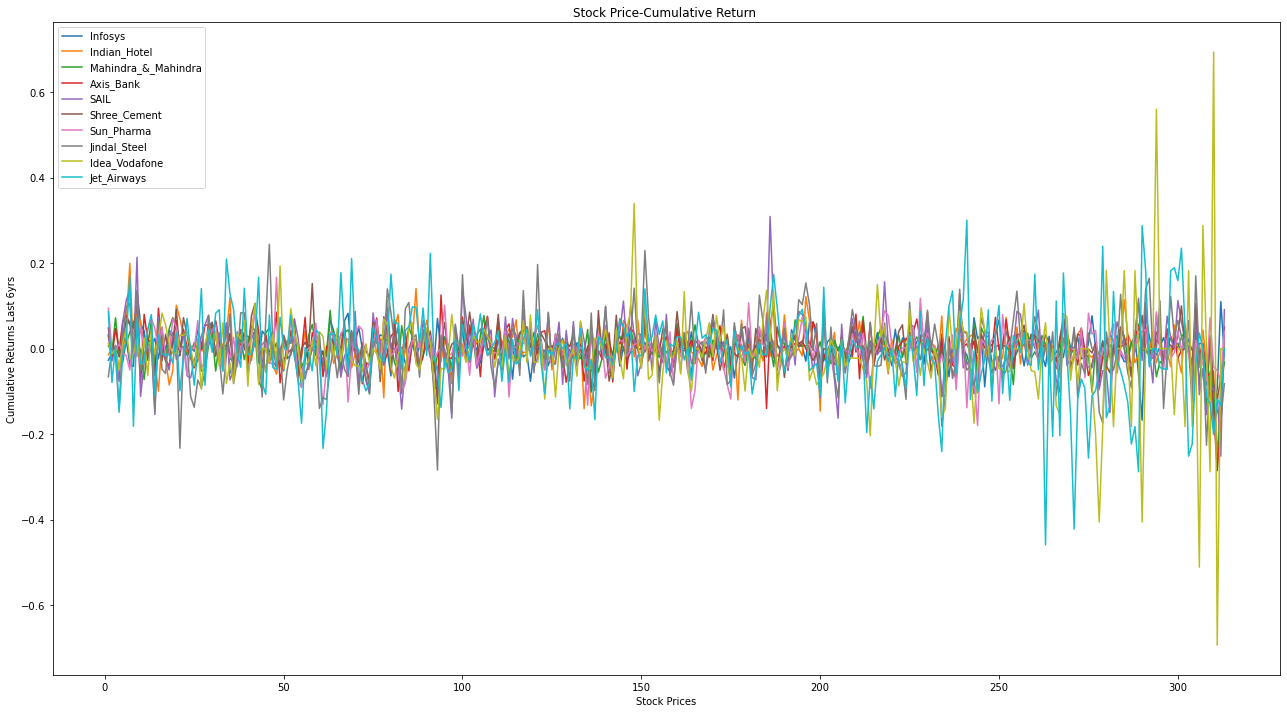

In [57]:
streturn.plot(figsize=(22,12))
plt.xlabel("Stock Prices")
plt.ylabel("Cumulative Returns Last 6yrs")
plt.title("Stock Price-Cumulative Return ")
plt.show()

In [59]:
stock_means = streturn.mean(axis = 0)
stock_means


Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

In [61]:
stock_sd = streturn.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

In [62]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df.sort_values(by=['Average'],ascending=False)

,Average,Volatility
Shree_Cement,0.003681,0.039917
Infosys,0.002794,0.035070
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131
Sun_Pharma,-0.001455,0.045033
Mahindra_&_Mahindra,-0.001506,0.040169
SAIL,-0.003463,0.062188
Jindal_Steel,-0.004123,0.075108
Jet_Airways,-0.009548,0.097972
Idea_Vodafone,-0.010608,0.104315


In [63]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df.sort_values(by=['Volatility'],ascending=False)

,Average,Volatility
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972
Jindal_Steel,-0.004123,0.075108
SAIL,-0.003463,0.062188
Indian_Hotel,0.000266,0.047131
Axis_Bank,0.001167,0.045828
Sun_Pharma,-0.001455,0.045033
Mahindra_&_Mahindra,-0.001506,0.040169
Shree_Cement,0.003681,0.039917
Infosys,0.002794,0.035070


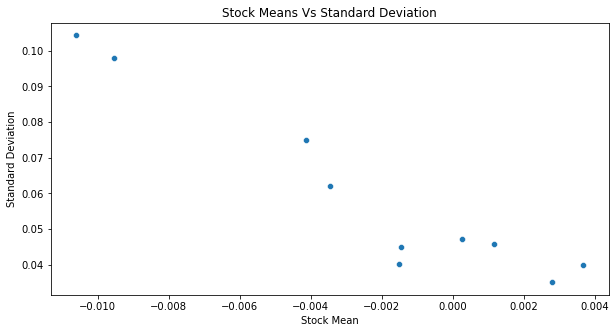

In [64]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Average'],
df['Volatility'],palette="deep")
plt.ylabel("Standard Deviation")
plt.xlabel("Stock Mean")
plt.title("Stock Means Vs Standard Deviation")
plt.show()